In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os
import random
import sys
from pathlib import Path

sns.set_theme(style='whitegrid')
%matplotlib inline

tp_root = '/home/facuvulcano/Machine-Learning/TP4/'
src_dir = os.path.join(tp_root, 'src')

if src_dir not in sys.path:
    sys.path.append(src_dir)
    
from datasets.cross_validation import cross_val

logs_dir = os.path.join(tp_root, 'src', 'train_test', 'logs')
results_dir = os.path.join(tp_root, 'results')
folds_dir = os.path.join(results_dir, 'folds')

os.makedirs(logs_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(folds_dir, exist_ok=True)

script_path = os.path.join(tp_root, 'main.py')
python_executable = '/home/facuvulcano/miniconda3/envs/ML/bin/python'
working_dir = os.path.dirname(script_path)

---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## 1 Implementacion de una red neuronal multicapa densa

**Objetivo:** Entrenar una red neuronal con 3 capas ocultas, con 10, 8 y 4 neuronas respectivamente, utilizando ReLU como funcion de activacion y unn learning rate 1e-8. Se evaluara el modelo en el conjunto de validacion utilizando metricas RMSE, MAE y R2, y se graficaran las curvas de error de entrenamiento y validacion.

Ejecutando entrenamiento de red neuronal..

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch no especificado. Usando entrenamiento batch completo: 219

Entrenamiento durante 100 epocas.
Resultados finales:
Train Loss=0.2313, Val Loss=0.2424, RMSE=26293.4434, MAE=22887.5869, R2=-2.9740

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_linear_lambda_0_Q1.csv

Errores:



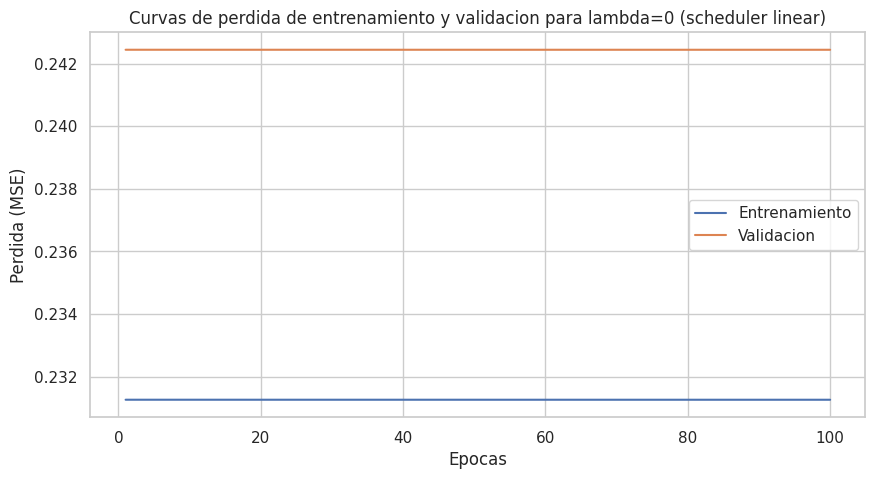

In [2]:
log_file_q1 = os.path.join(logs_dir, 'training_linear_lambda_0_Q1.log')
metrics_file_q1 = os.path.join(results_dir, 'evaluation_metrics_linear_lambda_0_Q1.csv')

command_1a = [
    python_executable,
    script_path,
    '--log_file', log_file_q1,
    '--metrics_file', metrics_file_q1,
    '--num_epochs', '100',
    '--initial_learning_rate', '0.00000001'
]

print("Ejecutando entrenamiento de red neuronal..")
result_1a = subprocess.run(command_1a, cwd=working_dir, capture_output=True, text=True)

print(result_1a.stdout)
print("Errores:")
print(result_1a.stderr)

metrics_1a = pd.read_csv(metrics_file_q1)
metrics_1a.head()

# Grafico de curvas de perdida de entrenamiento y validacion
plt.figure(figsize=(10, 5))
plt.plot(metrics_1a['Epoch'], metrics_1a['Train Loss'], label='Entrenamiento')
plt.plot(metrics_1a['Epoch'], metrics_1a['Val Loss'], label='Validacion')
plt.xlabel('Epocas')
plt.ylabel('Perdida (MSE)')
plt.title('Curvas de perdida de entrenamiento y validacion para lambda=0 (scheduler linear)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(results_dir, 'loss_curves_linear_lambda_0.png'))
plt.show()

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

### **Analisis de resultados pregunta 1:**

La falta de variacion en las perdidas de entrenamiento y validacion indica que el modelo no esta aprendiendo de los datos. Normalmente se deberia esperar una disminucion progresiva de las perdidas a medida que el modelo mejora su capacidad predictiva.

RMSE y MAE muestran una disminucion extremadamente chica, lo que sugiere una mejora insignificante en la precision del modelo.

R2 presenta un valor negativo, lo que indicaria que el modelo con estos parametros es peor que una simple prediccion basada en la media de los datos. Esto refleja una capacidad predictiva muy pobre.

Este rendimiento suboptimo del modelo puede atribuirse principalmente a los siguientes factores:

- Tasa de aprendizaje muy baja: una taza de aprendizaje muy baja resultara en actualizaciones de pesos muy chicos durante el proceso de optimizacion, esto implicara que el modelo no aprenda patrones significativos de los datos, lo que se reflejara en la falta de mejoras en las perdidas y metricas. Matematicamente esto se entiende en la formula del gradiente descendiente, el learning rate hara que el valor del gradiente varie muy poco.

- La arquitectura del modelo tambien puede impactar en la performance de la red, pero en este caso la taza de aprendizaje baja tiene un mayor peso en el mal rendimiento del modelo.

---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## 2. Implementacion de Learning Rate Scheduelrs

**Objetivo:** Implementar diferentes estrategias de ajuste dinnamico de la tasa de aprendizaje y comaparar el rendimiento del modelo para cada una. Las variantes a explorar son:

- a) Linear decay
- b) Power law
- c) Exponential decay

Se debe graficar la evolucion del error en funcion de las epocas para cada scheduler.

In [3]:
scheduler_configs_q2 = {
    'linear' : {'final_lr' : 0.00001},
    'power' : {'power' : 2},
    'exponential' : {'decay_rate' : 0.1}
}

lambda_reg_q2 = 0.0

results_q2 = {}

for scheduler_type, params in scheduler_configs_q2.items():
    print(f'\nEntrenando con schedulers: {scheduler_type} y lambda={lambda_reg_q2}')

    log_file_q2 = os.path.join(logs_dir, f'training_{scheduler_type}_lambda_{lambda_reg_q2}_Q2.log')
    metrics_file_q2 = os.path.join(results_dir, f'evaluation_metrics_{scheduler_type}_lambda_{lambda_reg_q2}_Q2.csv')

    command_q2 = [
        python_executable,
        script_path,
        '--scheduler_type', scheduler_type,
        '--lambda_reg', str(lambda_reg_q2),
        '--log_file', log_file_q2,
        '--metrics_file', metrics_file_q2,
        '--num_epochs', '200',
        '--batch_size', '32'
    ]

    if scheduler_type == 'linear':
        command_q2 += ['--final_lr', str(params['final_lr']),
                       '--initial_learning_rate', "0.1"]
    elif scheduler_type == 'power':
        command_q2 += ['--power', str(params['power']),
                       '--initial_learning_rate', "0.1"]
    elif scheduler_type == 'exponential':
        command_q2 += ['--decay_rate', str(params['decay_rate']),
                       '--initial_learning_rate', "1"]

    result_q2 = subprocess.run(command_q2, cwd=working_dir, capture_output=True, text=True)

    print("Saldia estandar:")
    print(result_q2.stdout)
    print("Errores:")
    print(result_q2.stderr)

    if os.path.exists(metrics_file_q2):
        metrics_df_q2 = pd.read_csv(metrics_file_q2)
        results_q2[scheduler_type] = metrics_df_q2
    else:
        print(f'Archivo de metricas {metrics_file_q2} no encontrado.')


Entrenando con schedulers: linear y lambda=0.0
Saldia estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 200 epocas.
Resultados finales:
Train Loss=0.0098, Val Loss=0.0077, RMSE=4705.6539, MAE=3593.8946, R2=0.8745

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_linear_lambda_0.0_Q2.csv

Errores:


Entrenando con schedulers: power y lambda=0.0
Saldia estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 200 epocas.
Resultados finales:
Train Loss=0.0315, Val Loss=0.0263, RMSE=8609.8947, MAE=6120.1452, R2=0.3880

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Mac

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## Analisis pregunta 2:

La estrategia de Linear decay demostro que es altamente efectiva, logrando una dimsinucion significiativa en las perdidas y metricas de error. Se observa una alta capacidad predictiva con un $R^2$ de 0.8745 lo que indica que el modelo explica aproximadamente el 87.45% de la variabilidad de los datos de validacion.

Power law muestra una mejora en las perdidas y metricas de error en comparacion con el entrenamiento inicial, pero el $R^2$ de 0.3880 indicando una capacidad predictiva muy limitada. A diferencia de linear decay, power law no logro capturar patrones significativos de los datos, lo que sugeriria que esta estrategia no fue adecuada para este problema.

Exponential decay fue la peor estrategia dado que presenta un $R^2$ negativo, indicando que el modelo es peor que predecir con la media. Esto refleja una capacidad predictiva muy deficiente.

En conclusion los resultados obtenidos demuestran que la eleccion de la estrategia de ajuste dinamico de la tasa de aprendizaje es crucuail para el rendimiento de un modelo de red neuronal. Linear decay se destaco como la estrategia mas efecitva, logrando una muy buena capacidad predictiva y una significativa reduccion en las perdiads y metricas de error. Por otro lado power law y exponential decay no lograron capturar patrones significativos en los datos, lo que subraya la importancia de seleccionar y configurar de forma efectiva el scheduler segun el problema.



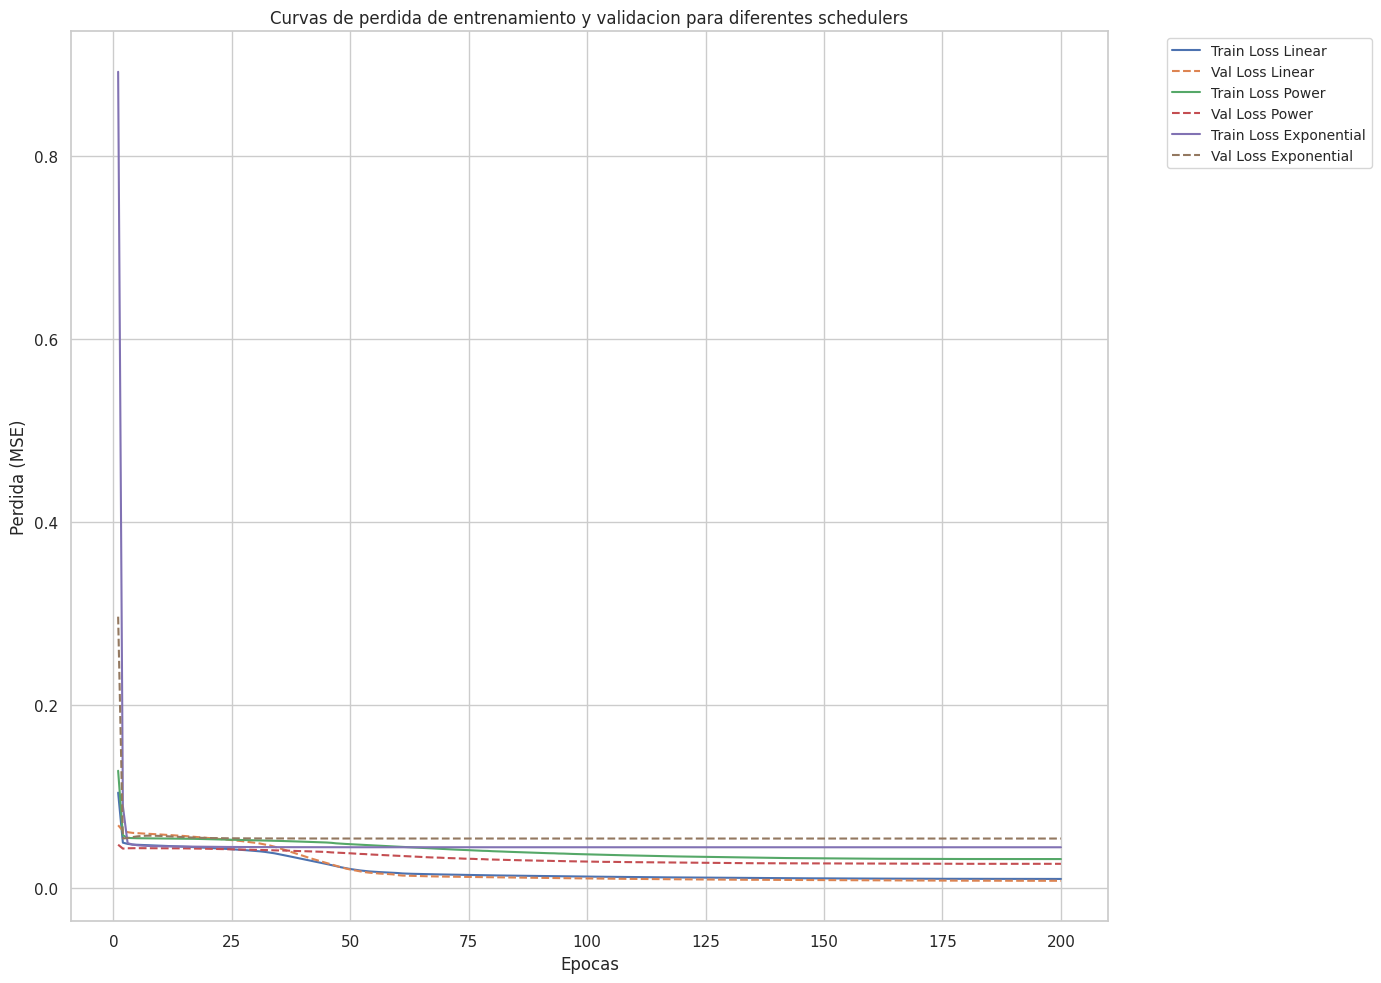

In [4]:
plt.figure(figsize=(14, 10))

for scheduler_type, metrics_df_q2 in results_q2.items():
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['Train Loss'], label=f'Train Loss {scheduler_type.capitalize()}')
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['Val Loss'], linestyle='--', label=f'Val Loss {scheduler_type.capitalize()}')

plt.xlabel('Epocas')
plt.ylabel('Perdida (MSE)')
plt.title('Curvas de perdida de entrenamiento y validacion para diferentes schedulers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'loss_curves_schedulers.png'))
plt.show()


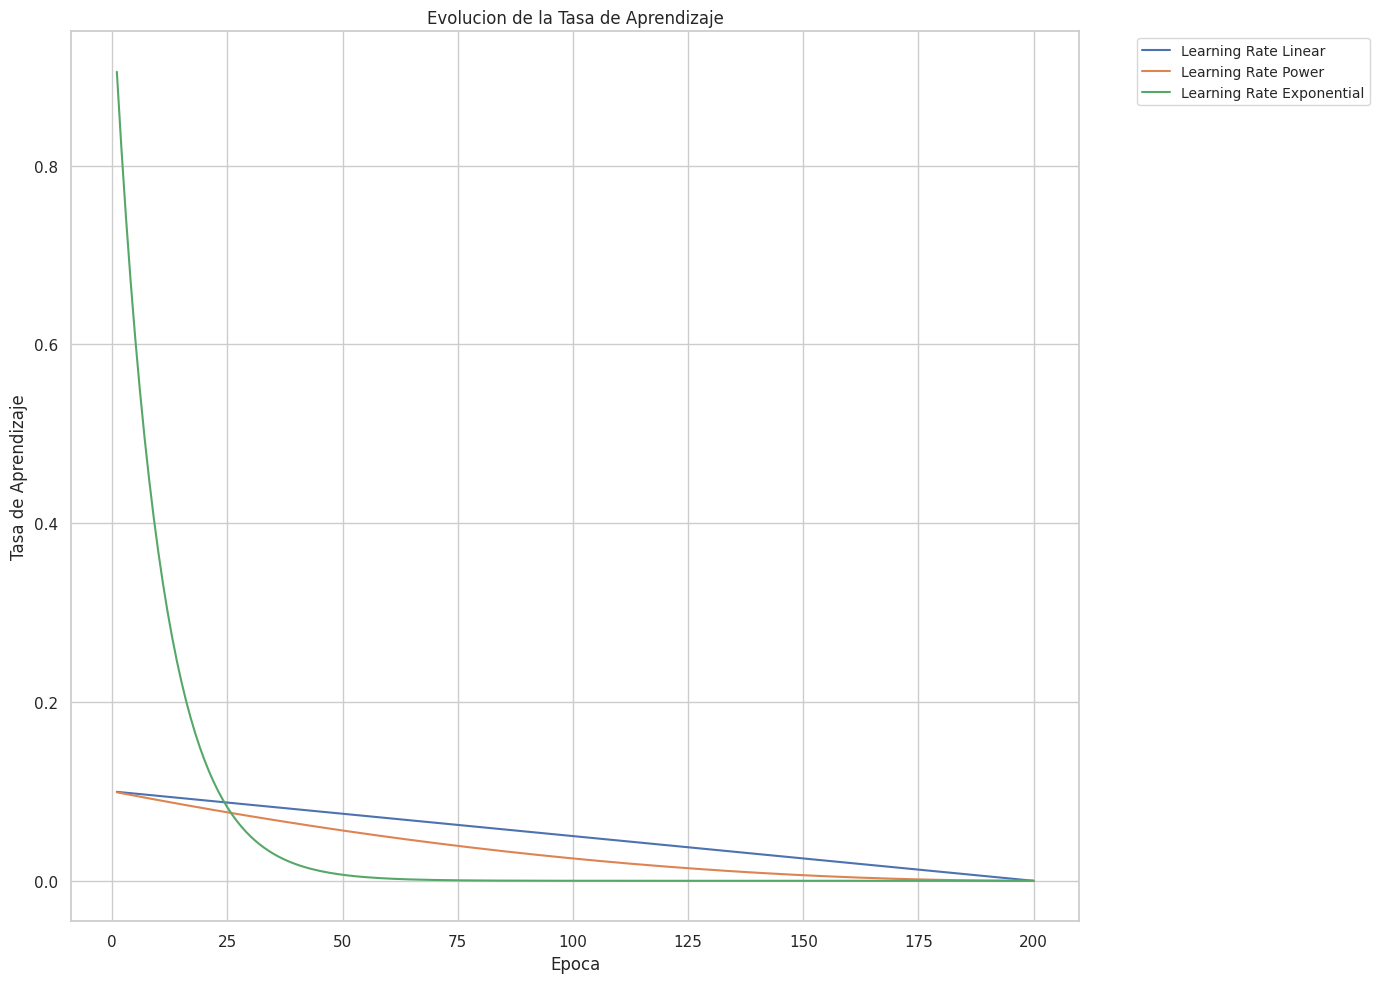

In [5]:
plt.figure(figsize=(14, 10))

for scheduler_type, metrics_df_q2 in results_q2.items():
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['Learning Rate'], label=f'Learning Rate {scheduler_type.capitalize()}')

plt.xlabel('Epoca')
plt.ylabel('Tasa de Aprendizaje')
plt.title('Evolucion de la Tasa de Aprendizaje')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'learning_evolution.png'))
plt.show()

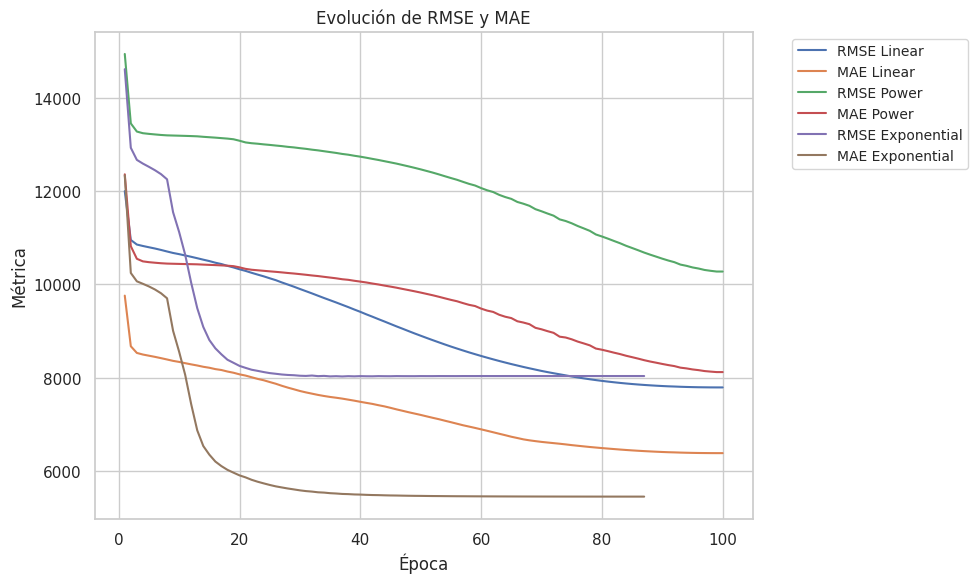

In [8]:
plt.figure(figsize=(10, 6))

for scheduler_type, metrics_df_q2 in results_q2.items():
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['RMSE'], label=f'RMSE {scheduler_type.capitalize()}')
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['MAE'], label=f'MAE {scheduler_type.capitalize()}')

plt.xlabel('Época')
plt.ylabel('Métrica')
plt.title('Evolución de RMSE y MAE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'RMSE_MAE.png'))
plt.show()

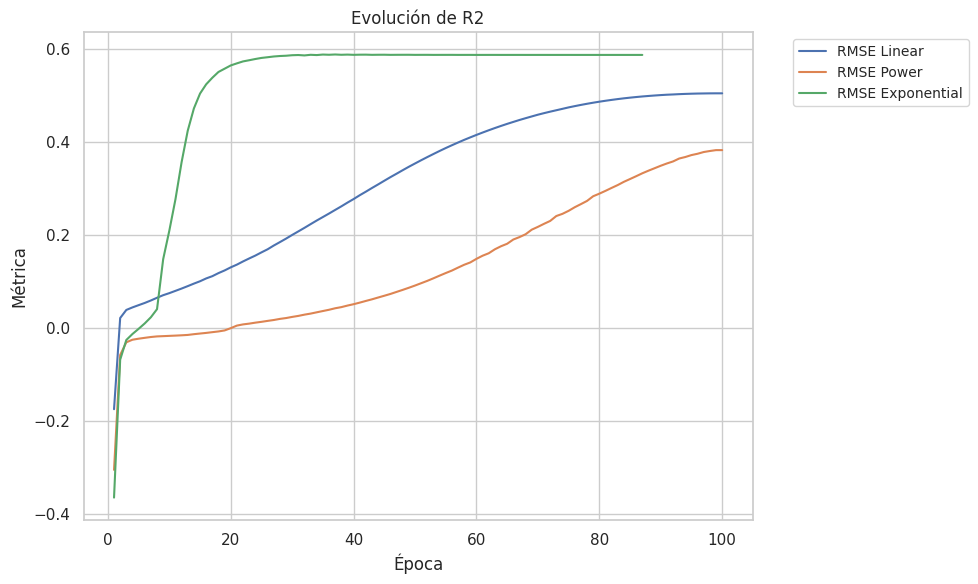

In [9]:
plt.figure(figsize=(10, 6))

for scheduler_type, metrics_df_q2 in results_q2.items():
    plt.plot(metrics_df_q2['Epoch'], metrics_df_q2['R2'], label=f'RMSE {scheduler_type.capitalize()}')

plt.xlabel('Época')
plt.ylabel('Métrica')
plt.title('Evolución de R2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'R2.png'))
plt.show()

In [10]:
metrics_list = []

for scheduler_type, metrics_df_q2 in results_q2.items():
    final_metrics = metrics_df_q2.tail(1)
    metrics_list.append({
        'scheduler'  : scheduler_type.capitalize(),
        'R2' : final_metrics['R2'].values[0],
        'RMSE' : final_metrics['RMSE'].values[0],
        'MAE' : final_metrics['MAE'].values[0]
    })

metrics_consolidated_q2 = pd.DataFrame(metrics_list)

metrics_consolidated_q2

,scheduler,R2,RMSE,MAE
0,Linear,0.504525,7791.316455,6383.199586
1,Power,0.382348,10274.444817,8119.891929
2,Exponential,0.587124,8035.434415,5451.442204


/tmp/ipykernel_9533/3607900952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='R2', data=metrics_consolidated_q2, palette='viridis')


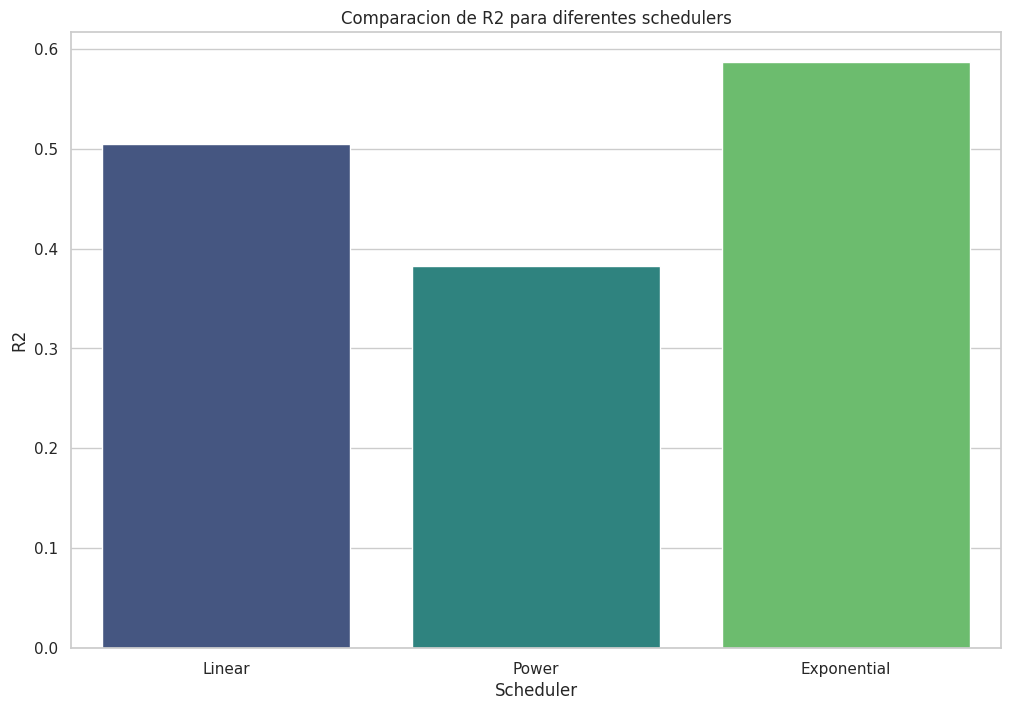

/tmp/ipykernel_9533/3607900952.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='RMSE', data=metrics_consolidated_q2, palette='magma')


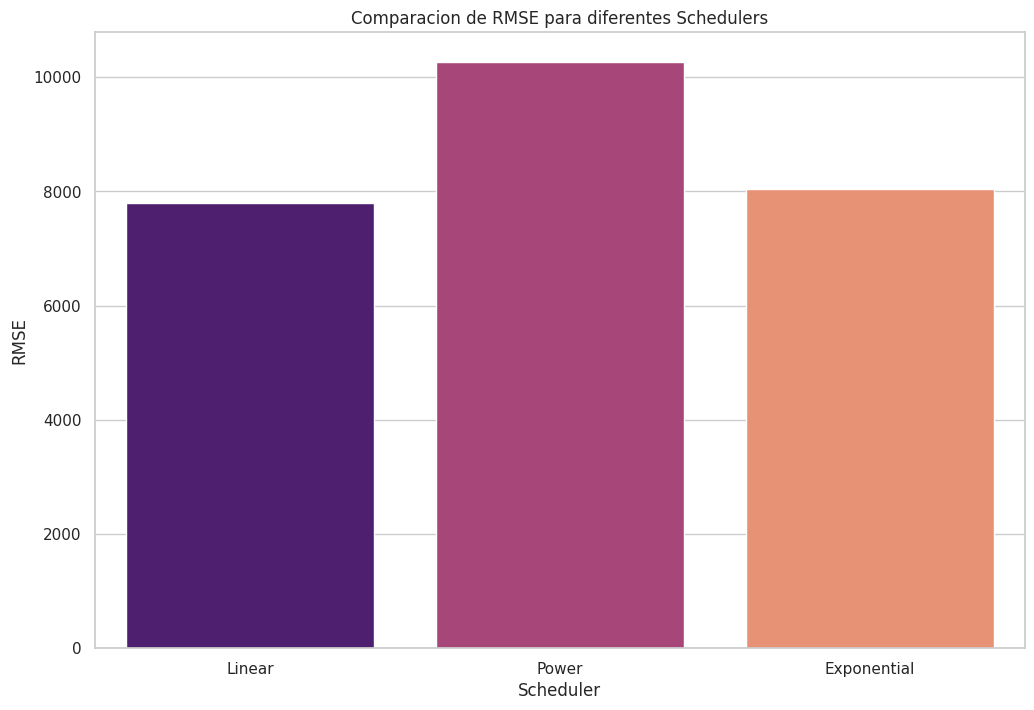

/tmp/ipykernel_9533/3607900952.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scheduler', y='MAE', data=metrics_consolidated_q2, palette='plasma')


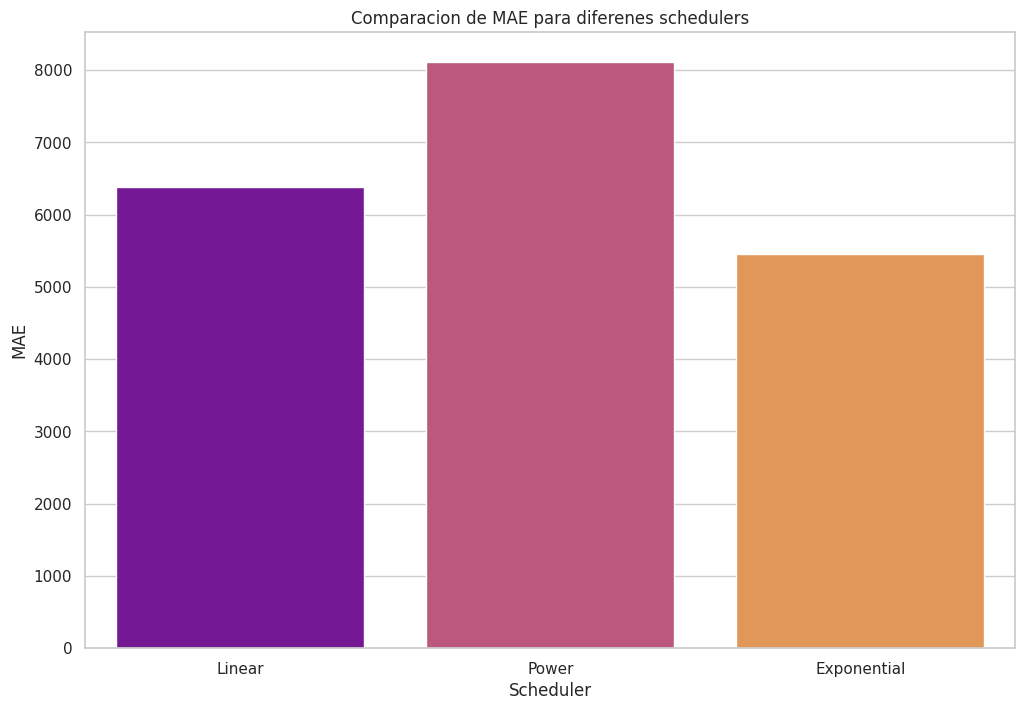

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='R2', data=metrics_consolidated_q2, palette='viridis')
plt.title('Comparacion de R2 para diferentes schedulers')
plt.xlabel('Scheduler')
plt.ylabel('R2')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='RMSE', data=metrics_consolidated_q2, palette='magma')
plt.title('Comparacion de RMSE para diferentes Schedulers')
plt.xlabel('Scheduler')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='scheduler', y='MAE', data=metrics_consolidated_q2, palette='plasma')
plt.title('Comparacion de MAE para diferenes schedulers')
plt.xlabel('Scheduler')
plt.ylabel('MAE')
plt.show()

---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## 3. Implementacion de Regularizacion L2

**Objetivo**: Implementar la tecnica de regularizacion L2 en la red neuronal para evitar el sobreajuste. Ajustar el hiperparametro de regularizacion lambda utilizando el conjunto de validacion. Mostrar graficos de eror de entrenamiento y validacion para distintos valores de lambda.

In [6]:
lambda_values_q3 = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

scheduler_type_q3 = 'linear'
results_q3 = {}

for lambda_reg in lambda_values_q3:
    print(f'\nEntrenando con scheduler={scheduler_type_q3} y lambda_reg={lambda_reg}')

    log_file_q3 = os.path.join(logs_dir, f'training_{scheduler_type_q3}_lambda_{lambda_reg}.log')
    metrics_file_q3 = os.path.join(results_dir, f'evaluation_metrics_{scheduler_type_q3}_lambda_{lambda_reg}.csv')

    command_q3 = [
        python_executable,
        script_path,
        '--scheduler_type', scheduler_type_q3,
        '--initial_learning_rate', "0.1",
        '--final_lr' , "0.00001",
        '--lambda_reg', str(lambda_reg),
        '--log_file', log_file_q3,
        '--metrics_file', metrics_file_q3,
        '--num_epochs', '100',
        '--batch_size', '32'
    ]

    result_q3 = subprocess.run(command_q3, cwd=working_dir, capture_output=True, text=True)

    print("Salida estandar:")
    print(result_q3.stdout)
    print("Errores:")
    print(result_q3.stderr)

    if os.path.exists(metrics_file_q3):
        try:
            metrics_df_q3 = pd.read_csv(metrics_file_q3)
            results_q3[lambda_reg] = metrics_df_q3

        except Exception as e:
            print(f'Error al leer el archivo de metricas {metrics_file_q3}: {e}')
    else:
         print(f"Archivo de metricas {metrics_file_q3} no encontrado")
    



Entrenando con scheduler=linear y lambda_reg=0
Salida estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 100 epocas.
Resultados finales:
Train Loss=0.0389, Val Loss=0.0327, RMSE=10201.3664, MAE=8282.0119, R2=0.1911

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_linear_lambda_0.csv

Errores:


Entrenando con scheduler=linear y lambda_reg=1e-05
Salida estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 100 epocas.
Resultados finales:
Train Loss=0.0468, Val Loss=0.0443, RMSE=11874.1151, MAE=9527.0711, R2=-0.0031

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/

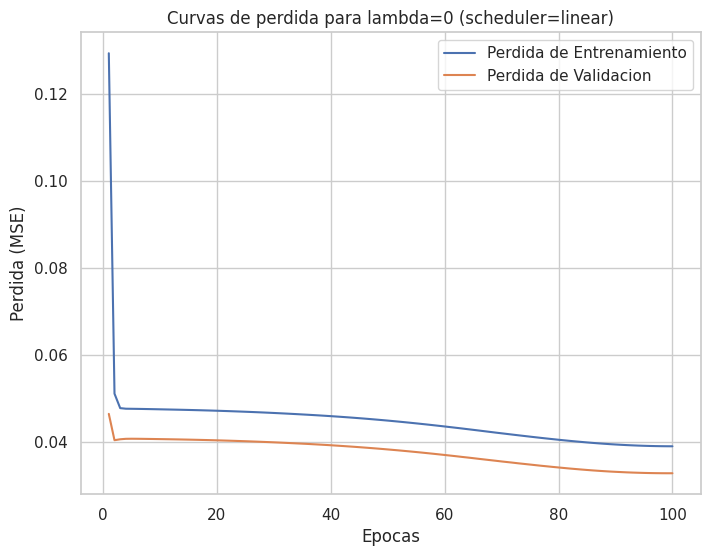

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_0.png


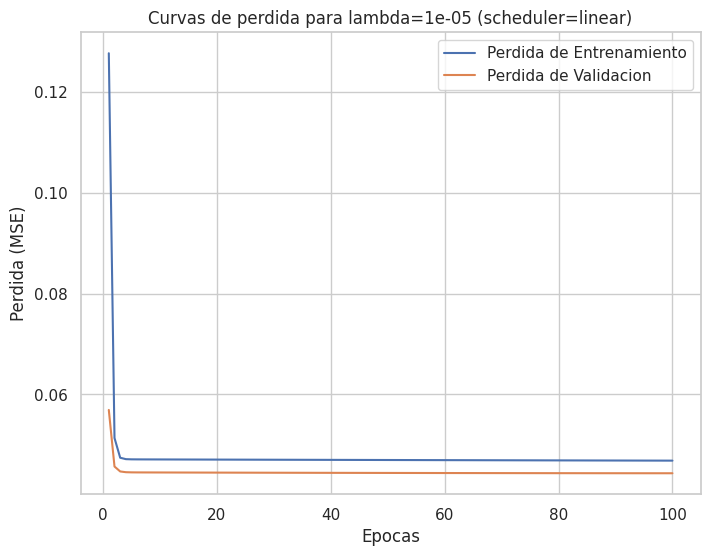

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_1e-05.png


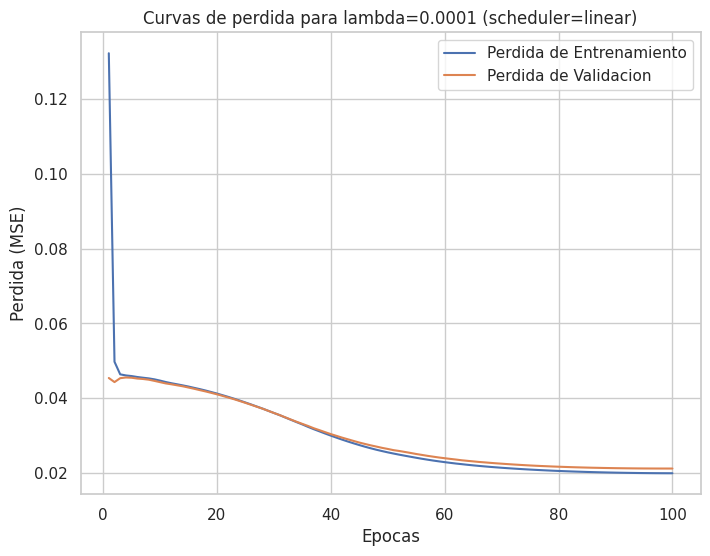

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_0.0001.png


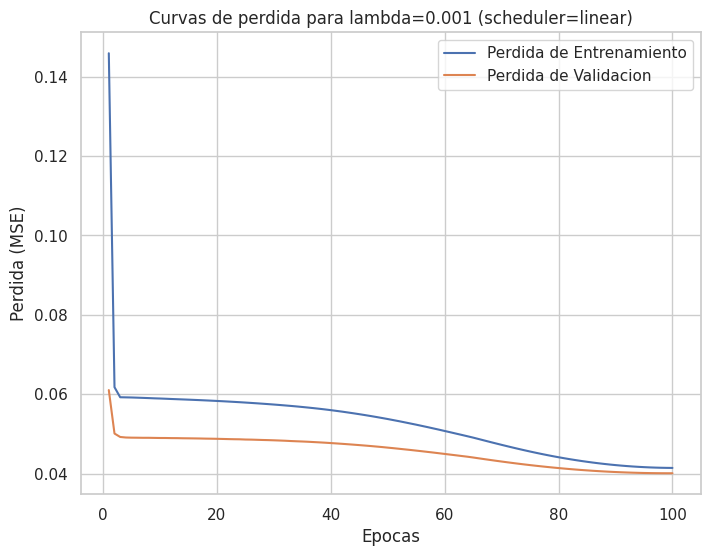

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_0.001.png


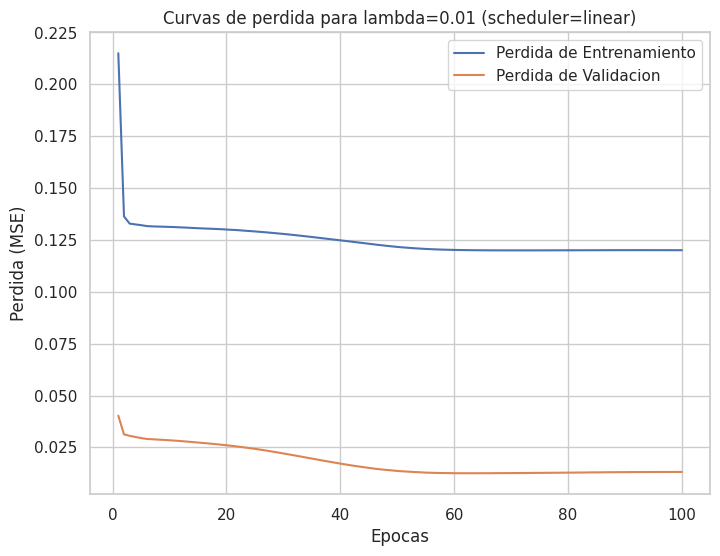

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_0.01.png


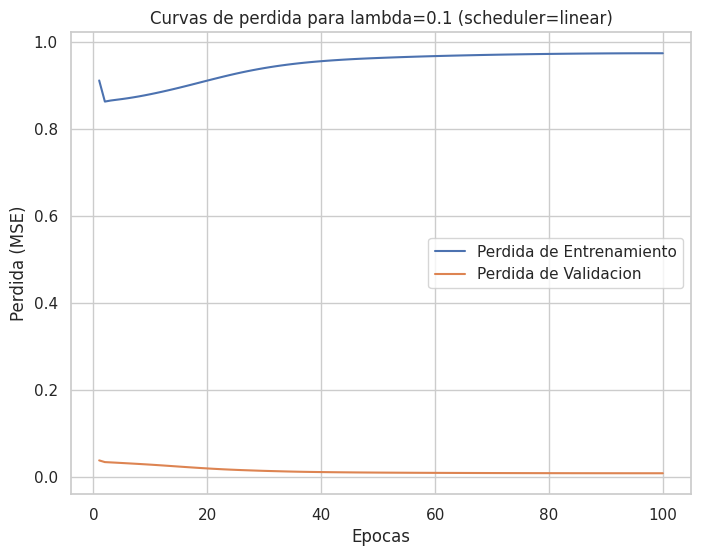

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_0.1.png


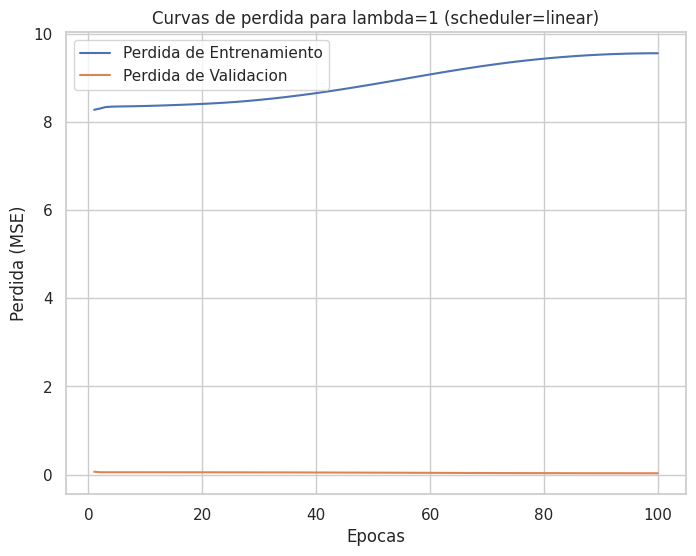

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_linear_lambda_1.png


In [7]:
if not results_q3:
    print('No hay metricas disponibles para graficar.')
else:
    for lambda_reg, metrics_df_q3 in results_q3.items():
        plt.figure(figsize=(8, 6))
        plt.plot(metrics_df_q3['Epoch'], metrics_df_q3['Train Loss'], label='Perdida de Entrenamiento')
        plt.plot(metrics_df_q3['Epoch'], metrics_df_q3['Val Loss'], label='Perdida de Validacion')
        plt.xlabel('Epocas')
        plt.ylabel('Perdida (MSE)')
        plt.title(f'Curvas de perdida para lambda={lambda_reg} (scheduler={scheduler_type_q3})')
        plt.legend()
        plt.grid(True)
        plot_filename = os.path.join(results_dir, f'loss_curves_{scheduler_type_q3}_lambda_{lambda_reg}.png')
        plt.savefig(plot_filename)
        plt.show()
        print(f'Grafico guardado en {plot_filename}')

---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **4. Implementacion de distintos optimizadores**

In [9]:
scheduler_type_q4 = 'linear'

optimizer_configs_q4 = {
    'adam' : {'learning_rate' : 0.01, 'beta1' : 0.9, 'beta2' : 0.999, 'epsilon' : 1e-8},
    'sgd' : {'learning_rate' : 0.1},
    'sgd_momentum' : {'learning_rate' : 0.1, 'momentum' : 0.9},
    'mini_batch_sgd' : {'learning_rate' : 0.1}
}

lambda_reg_q4 = 0

results_q4 = {}

for optimizer_type, params in optimizer_configs_q4.items():

    log_file_q4 = os.path.join(logs_dir, f'training_{optimizer_type}_lambda_{lambda_reg_q4}.log')
    metrics_file_q4 = os.path.join(results_dir, f'evaluation_metrics_{optimizer_type}_lambda_{lambda_reg_q4}.csv')

    command_q4 = [
        python_executable,
        script_path,
        '--optimizer', optimizer_type,
        '--scheduler_type', scheduler_type_q4,
        '--lambda_reg', str(lambda_reg_q4),
        '--log_file', log_file_q4,
        '--metrics_file', metrics_file_q4,
        '--num_epochs', '200', 
        '--final_lr', '0.00001',
        '--initial_learning_rate', str(params['learning_rate']),
        '--batch_size', '32'
    ]

    if optimizer_type == 'sgd_momentum':
        command_q4 += ['--momentum', str(params['momentum'])]
    elif optimizer_type == 'adam':
        command_q4 += [
            '--beta1', str(params['beta1']), 
            '--beta2', str(params['beta2']), 
            '--epsilon', str(params['epsilon'])
            ]

    print(f"Ejecutando entrenamiento con optimizador: {optimizer_type}... ")
    result_q4 = subprocess.run(command_q4, cwd=working_dir, capture_output=True, text=True)

    print("Salida estandar:")
    print(result_q4.stdout)
    print("Errores:")
    print(result_q4.stderr)

    if os.path.exists(metrics_file_q4):
        metrics_df_q4 = pd.read_csv(metrics_file_q4)
        results_q4[optimizer_type] = metrics_df_q4

        plt.figure(figsize=(10, 5))
        plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Train Loss'], label='Entrenamiento')
        plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Val Loss'], label='Validacion')
        plt.xlabel('Epocas')
        plt.ylabel('Perdida (MSE)')
        plt.title(f'Curvas de perdida para optimizador {optimizer_type} (lambda={lambda_reg_q4})')
        plt.legend()
        plt.grid(True)
        plot_filename = os.path.join(results_dir, f'loss_curves_{optimizer_type}_lambda_{lambda_reg_q4}.png')
        plt.savefig(plot_filename)
        plt.close()
        print(f"Grafico guardado en {plot_filename}")
    else:
        print(f'Archivo de metricas {metrics_file_q4} no encontrado.')



Ejecutando entrenamiento con optimizador: adam... 
Salida estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 200 epocas.
Resultados finales:
Train Loss=0.0037, Val Loss=0.0059, RMSE=4094.1852, MAE=3023.2650, R2=0.9019

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_adam_lambda_0.csv

Errores:

Grafico guardado en /home/facuvulcano/Machine-Learning/TP4/results/loss_curves_adam_lambda_0.png
Ejecutando entrenamiento con optimizador: sgd... 
Salida estandar:

Cantidad de capas ocultas: 3
Capa oculta: 1 tiene 10 neuronas 
Capa oculta: 2 tiene 8 neuronas 
Capa oculta: 3 tiene 4 neuronas 
Cantidad de parametros: 329
Tamanio del batch especificado: 32

Entrenamiento durante 200 epocas.
Resultados finales:
Train Loss=0.0138, Val Loss=0.0128, RMSE=6387.8349,

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## Analisis pregunta 4:

Adam logro el mejor rendimiento entre todos los optimizadores evaluados, con una perdida de entrenamiento y validacion extremadamente baja y un coeficiente de determinacion ($R^2$) de 0.9, indicando que el modelo explica aproximandamente el 90% de la variablidad en los datos de validacion. Se puede observar una rapida disminucion de la perdida desde el inicio del entrenamiento, manteniendo una trayectoria estable.

SGD mostro un buen rendimiento en general con una perdida relativamente baja y un $R^2$ de 0.75, indicando una capacidad predictiva relativamente buena. Aunque no fue tan rapido como Adam, SGD logro una disminucion constante de la perdida.

SGD con momentum no logro mejorar el rendimiento del modelo, resultando en un $R^2$ negativo, lo que indica que el modelo esta funcionando peor que predecir la media. El entrenamiento se detuvo antes de completar todas las epocas, particularmente en la epoca 56 lo que indiica que no hubo mejroas significativas en las metricas. La combinacion de momentum con la tasa de aprendizaje utilizada pudo haber llevado a oscilaciones en minimos locales impidiendo convergencia adecuada.

Mini-Batch SGD logro un rendimiento bueno con un $R^2$ de 0.82, demostrando una buena capacidad predictiva. Utilizar mini batches permite una estimacion mas estable de los gradientes en comparacion con SGD puro, mejorando la convergencia. 



In [10]:
# Figura 1: Perdida de Entrenamiento
plt.figure(figsize=(10, 6))
for optimizer_type, metrics_df_q4 in results_q4.items():
    plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Train Loss'], label=optimizer_type)
plt.xlabel('Epocas')
plt.ylabel('Perdidad de Entrenamiento (MSE)')
plt.title(f'Evolucion de la perdida de Entrenamiento para distintos optimizers (scheduelr={scheduler_type_q4})')
plt.legend()
plt.grid(True)
plot_filename_train = os.path.join(results_dir, f'train_loss_comparison_{scheduler_type_q4}.png')
plt.savefig(plot_filename_train)
plt.close()
print(f'Grafico de perdida de entrenamiento guardado en {plot_filename_train}')

# Figura 2: Perdida de Validacion
plt.figure(figsize=(10, 6))
for optimizer_type, metrics_df_q4 in results_q4.items():
    plt.plot(metrics_df_q4['Epoch'], metrics_df_q4['Val Loss'], label=optimizer_type)
plt.xlabel('Epocas')
plt.ylabel('Perdida de Validacion (MSE)')
plt.title(f'Evolucion de la perdida de validacion para distintos optimizers (scheduler={scheduler_type_q4})')
plt.legend()
plt.grid(True)
plot_filename_val = os.path.join(results_dir, f'val_loss_comparsion_{scheduler_type_q4}.png')
plt.savefig(plot_filename_val)
plt.close()
print(f'Grafico de perdida de validacion guardado en {plot_filename_val}')

Grafico de perdida de entrenamiento guardado en /home/facuvulcano/Machine-Learning/TP4/results/train_loss_comparison_linear.png
Grafico de perdida de validacion guardado en /home/facuvulcano/Machine-Learning/TP4/results/val_loss_comparsion_linear.png


---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **5. Busqueda de hiperparametros**: 

**Objetivo**: Utilizando el conjunto de desarrollo y la metodología de cross-validation con 5 folds, seleccionar los hiperparámetros L y $M^{(ℓ)}$ óptimos para la red neuronal. 

In [12]:
from datasets.preprocessing import processing

df = pd.read_csv('/home/facuvulcano/Machine-Learning/TP4/data/raw/toyota_dev.csv')
df_path = processing(df)
processed_df = pd.read_csv(df_path)

folds = 5
training_splits, validation_splits = cross_val(processed_df, 'Precio', folds)

for fold in range(folds):
    X_train, y_train = training_splits[fold]
    X_val, y_val = validation_splits[fold]

    train_data_path = os.path.join(folds_dir, f'fold{fold}_train')
    val_data_path = os.path.join(folds_dir, f'fold{fold}_val')

    train_df = X_train.copy()
    train_df['Precio'] = y_train
    train_df.to_csv(f'{train_data_path}.csv', index=False)

    val_df = X_val.copy()
    val_df['Precio'] = y_val
    val_df.to_csv(f'{val_data_path}.csv', index=False)

    print(f'Fold {fold}: Splits guardados correctamente.')

print("Splits de validacion cruzada generados y guardados correctamente.")

Fold 0: Splits guardados correctamente.
Fold 1: Splits guardados correctamente.
Fold 2: Splits guardados correctamente.
Fold 3: Splits guardados correctamente.
Fold 4: Splits guardados correctamente.
Splits de validacion cruzada generados y guardados correctamente.


In [13]:
scheduler_type_q5 = 'linear'
lambda_reg_q5 = 0
L_values = [2, 3] #Numero de capas ocultas
M_choices = [4, 5, 6, 7, 8, 9]  # Numero de neuronas por capa
n_iter_search = 5 #Numero de combinaciones aleatorias a probar

random.seed(42)
random_hyperparams = []

for _ in range(n_iter_search):
    L = random.choice(L_values)
    M_list = [random.choice(M_choices) for _ in range(L)]
    random_hyperparams.append({
        'L' : L,
        'M_list' : M_list
    })

print(M_list)

print(f'Se han generado {n_iter_search} combinaciones aleatorias de hiperparametros.')
print(random_hyperparams)

[4, 4]
Se han generado 5 combinaciones aleatorias de hiperparametros.
[{'L': 2, 'M_list': [4, 9]}, {'L': 3, 'M_list': [5, 5, 5]}, {'L': 2, 'M_list': [9, 9]}, {'L': 2, 'M_list': [8, 7]}, {'L': 2, 'M_list': [4, 4]}]


In [14]:
results_q5 = []

for idx, hyperparams in enumerate(random_hyperparams):
    L = hyperparams['L']
    M_list = hyperparams['M_list']

    val_losses = []
    rmses = []
    maes = []
    r2s = []

    print(f'\n=== Evaluando combinacion {idx+1}/{n_iter_search} ===')
    print(f'Hiperparametros: L={L}, M_list={M_list}, lambda_reg={lambda_reg_q5}, scheduler_type={scheduler_type_q5}')


    for fold in range(folds):
        
        train_data_path = os.path.join(folds_dir, f'fold{fold}_train.csv')
        val_data_path = os.path.join(folds_dir, f'fold{fold}_val.csv')

        log_file_q5 = os.path.join(logs_dir, f'training_L{L}_M{"_".join(map(str, M_list))}_fold{fold}_lambda_{lambda_reg_q5}.log')
        metrics_file_q5 = os.path.join(results_dir, f'evaluation_metrics_L{L}_M{"_".join(map(str, M_list))}_fold{fold}_lambda_{lambda_reg_q5}.csv')
    

        command_q5 = [
            python_executable,
            script_path,
            '--optimizer', 'adam',
            '--beta1', '0.9',
            '--beta2', '0.999',
            '--epsilon', '1e-8',
            '--scheduler_type', scheduler_type_q5,
            '--lambda_reg', str(lambda_reg_q5),
            '--log_file', log_file_q5,
            '--metrics_file', metrics_file_q5,
            '--num_epochs', '20',
            '--final_lr', '0.00001',
            '--initial_learning_rate', '0.01',
            '--L', str(L),
            '--M_list', ','.join(map(str, M_list)),
            '--train_data', train_data_path,
            '--val_data', val_data_path,
            '--batch_size', '32'
        ]

        print(f"Fold {fold}: Entrenando...")
        result_q5 = subprocess.run(command_q5, cwd=working_dir, capture_output=True, text=True)

        print("salida estandar:")
        print(result_q5.stdout)
        print("Errores:")
        print(result_q5.stderr)

        if os.path.exists(metrics_file_q5):
            metrics_df_q5 = pd.read_csv(metrics_file_q5)
            final_val_loss = metrics_df_q5['Val Loss'].iloc[-1]
            final_rmse = metrics_df_q5['RMSE'].iloc[-1]
            final_mae = metrics_df_q5['MAE'].iloc[-1]
            final_r2 = metrics_df_q5['R2'].iloc[-1]
            
            val_losses.append(final_val_loss)
            rmses.append(final_rmse)
            maes.append(final_mae)
            r2s.append(final_r2)

            print(f'Fold {fold}: Val Loss={final_val_loss}, RMSE={final_rmse}, MAE={final_mae}, R2={final_r2}')
        else:
            print(f'Archivo de metricas {metrics_file_q5} no encontrado')
            val_losses.append(np.inf)
            rmses.append(np.inf)
            maes.append(np.inf)
            r2s.append(-np.inf)
        
    avg_val_loss = np.mean(val_losses)
    avg_rmse = np.mean(rmses)
    avg_mae = np.mean(maes)
    avg_r2 = np.mean(r2s)

    results_q5.append({
        'L' : L,
        'M_list' : M_list,
        'lambda_reg' : lambda_reg_q5,
        'scheduler_type' : scheduler_type_q5,
        'Avg Val Loss' : avg_val_loss,
        'RMSECV' : avg_mae,
        'MAECV' : avg_mae,
        'R2CV' : avg_r2
    })
    print(f'Hiperparametros L={L}, M_list={M_list}, lambda_reg={lambda_reg_q5}, scheduler_type={scheduler_type_q5} - '
          f'perdida de validacion promedio: {avg_val_loss}, RMSECV: {avg_rmse}, MAECV: {avg_mae}, R2CV: {avg_r2}')




=== Evaluando combinacion 1/5 ===
Hiperparametros: L=2, M_list=[4, 9], lambda_reg=0, scheduler_type=linear
Fold 0: Entrenando...
salida estandar:

Cantidad de capas ocultas: 2
Capa oculta: 1 tiene 4 neuronas 
Capa oculta: 2 tiene 9 neuronas 
Cantidad de parametros: 143
Tamanio del batch especificado: 32

Entrenamiento durante 20 epocas.
Resultados finales:
Train Loss=0.0033, Val Loss=0.0035, RMSE=5283.2293, MAE=3376.5143, R2=0.8498

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_L2_M4_9_fold0_lambda_0.csv

Errores:

Fold 0: Val Loss=0.0034758602873845, RMSE=5283.229290546838, MAE=3376.514292354226, R2=0.8498079988187235
Fold 1: Entrenando...
salida estandar:

Cantidad de capas ocultas: 2
Capa oculta: 1 tiene 4 neuronas 
Capa oculta: 2 tiene 9 neuronas 
Cantidad de parametros: 143
Tamanio del batch especificado: 32

Entrenamiento durante 20 epocas.
Resultados finales:
Train Loss=0.0027, Val Loss=0.0018, RMSE=4280.1922, 

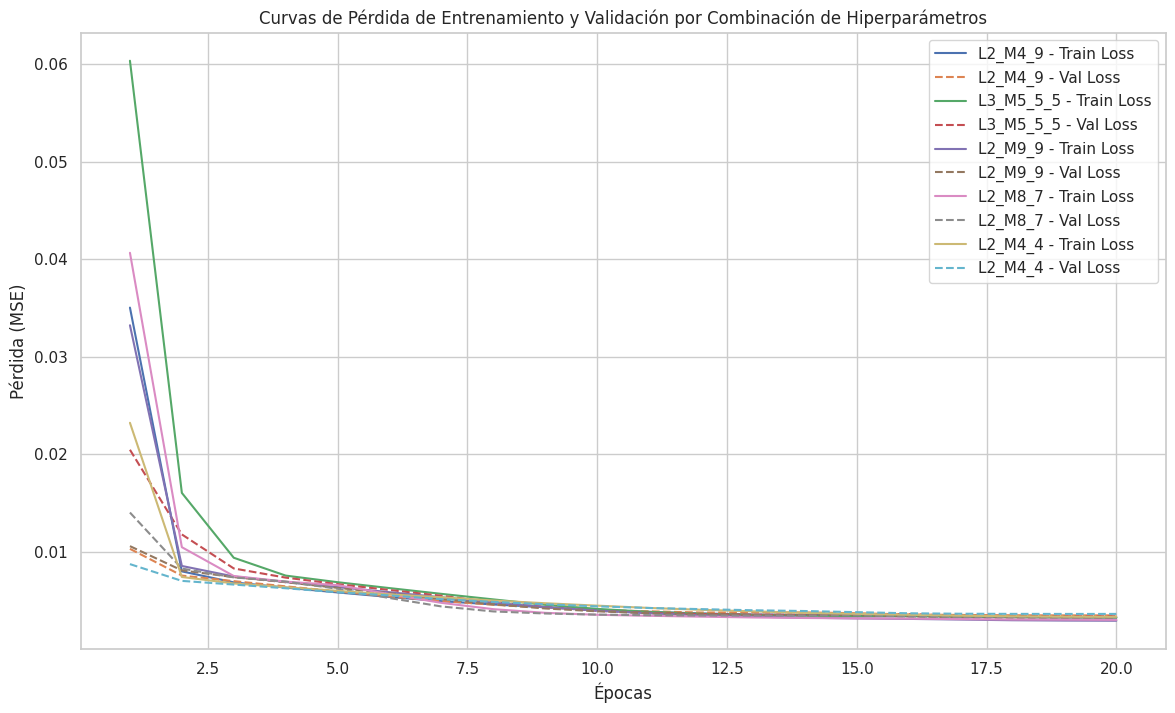

In [19]:
combinations = {
    'L2_M4_9': 'evaluation_metrics_L2_M4_9_fold0_lambda_0.csv',
    'L3_M5_5_5': 'evaluation_metrics_L3_M5_5_5_fold0_lambda_0.csv',
    'L2_M9_9': 'evaluation_metrics_L2_M9_9_fold0_lambda_0.csv',
    'L2_M8_7': 'evaluation_metrics_L2_M8_7_fold0_lambda_0.csv',
    'L2_M4_4': 'evaluation_metrics_L2_M4_4_fold0_lambda_0.csv'
}

# Graficar las curvas de pérdida
plt.figure(figsize=(14, 8))

for combo, filename in combinations.items():
    metrics_file = os.path.join(results_dir, filename)
    if os.path.exists(metrics_file):
        df = pd.read_csv(metrics_file)
        plt.plot(df['Epoch'], df['Train Loss'], label=f'{combo} - Train Loss')
        plt.plot(df['Epoch'], df['Val Loss'], label=f'{combo} - Val Loss', linestyle='--')
    else:
        print(f'Archivo de métricas para {combo} no encontrado.')

plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de Pérdida de Entrenamiento y Validación por Combinación de Hiperparámetros')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(results_dir, 'loss_curves_combinations.png'))
plt.show()

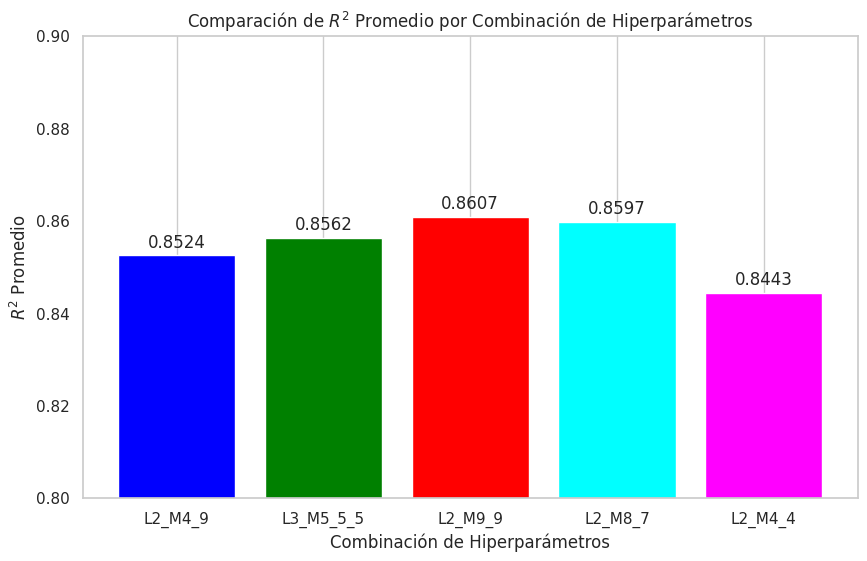

In [20]:
combinations = ['L2_M4_9', 'L3_M5_5_5', 'L2_M9_9', 'L2_M8_7', 'L2_M4_4']
r2_values = [0.8524, 0.8562, 0.8607, 0.8597, 0.8443]

plt.figure(figsize=(10, 6))
plt.bar(combinations, r2_values, color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.xlabel('Combinación de Hiperparámetros')
plt.ylabel('$R^2$ Promedio')
plt.title('Comparación de $R^2$ Promedio por Combinación de Hiperparámetros')
plt.ylim(0.80, 0.90)
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')
plt.grid(axis='y')
plt.savefig(os.path.join(results_dir, 'r2_comparison_combinations.png'))
plt.show()

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Analisis de resultados:**

Se analizaron cinco combinaciones de hiperparametros que varian en el numero de capas ocultas (L) y la distribucion de neuronas por capa (M_list). Se limito significativamente el numero de neuronas y de capas debido al excesivo tiempo de computo que requeria si se seleccionaban modelos que lleven a mayor cantidad de parametros. Este costo computacional probablemente se deba al modo en que plantie el backpropagation. 

Combinaciones aleatorias probadas:

- L = 2, M = [4, 9]

- L = 3, M = [5, 5, 5]

- L = 2, M = [9, 9]

- L = 2, M = [8, 7]

- L = 2, M = [4, 4]

Para la arquitectura L = 2 y M = [4, 9] este modelo presenta 143 parametros, se observo un $R^{2}$ promedio de 0.8524 lo cual indica una buena capacidad del modelo para explicar la variabilidad de los datos de validacion.

Para la arquitectura L = 3, M = [5, 5, 5], este modelo presenta 176 parametros, el $R^{2}$ observado es ligeramente superior a la combinacion 1, pero practicamente es intrascendte esa mejora.

Para la arquitectura L = 2, M = [9, 9], en este modelo tenemos 298 parametros. Se observa el mejor $R^{2}$ entre las evaluadas, pero aun asi no hay mucha diferencia con la anterior. Claramente si tenemos dos modelos con la misma cantidad de capas pero uno con mas neuronas que otro, es probable que esa complejidad extra que se le agrega se traduzca en mejor rendimiento, aunque no siempre sea asi.

Para la arquitectura L = 2, M = [8, 7], tenemos 247 parametros, y un buen $R^{2}$ lo que indicaria nuevamente que es una arquitectura aceptable para entrenar el modelo.

Para la arquitectura L = 2, M = [4, 4] tenemos 113 parametros, lo que es consistente con el $R^{2}$. Se puede observar que hay una dependencia, por lo menos con esta cantidad de epocas y para este problema en particular entre la cantidad de parametros y el $R^{2}$ obtenido.

Probablemente si hubiese elegido un modelo con una mayor cantidad de parametros este hubiese obtenido mejores resultados, pero dado que elegir dicho modelo agregaria demasiado tiempo de computo, opte por elegir modelos mas chicos.

Cabe aclarar que la red es demasiado chica, y las epocas por las cuales se entrenaron a los parametros son muy pocas, el modelo deberia de haber soportado una mayor cantidad de parametros y haber entrenado en una mayor cantidad de epocas sin sufrir tanto el costo de computo, esto es lo que da a entender que hay un problema de implementacion.



---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **6: Evaluar la performance del modelo final implementado:**

In [2]:
from datasets.preprocessing import processing
from utils.parse import parse_arguments
from train_test.train import train_final_model
from metrics.rmse import rmse
from metrics.mae import mae
from metrics.r2 import r2


best_hyperparams_q6 = {
    'L' : 2,
    'M_list' : [9, 9],
    'lambda_reg' : 0,
    'scheduler_type' : 'linear'
}

L = best_hyperparams_q6['L']
m_list = best_hyperparams_q6['M_list']
lambda_reg = best_hyperparams_q6['lambda_reg']
scheduler = best_hyperparams_q6['scheduler_type']
optimizer = 'adam'

results_q6 = []
        
df = pd.read_csv('/home/facuvulcano/Machine-Learning/TP4/data/raw/toyota_dev.csv')
df_path = processing(df)
processed_df = pd.read_csv(df_path)

log_file_q6 = os.path.join(logs_dir, f'training_L{L}_M{"_".join(map(str, m_list))}_scheduler_{scheduler}_lambda_{lambda_reg}_optimizer_{optimizer}.log')
metrics_file_q6 = os.path.join(results_dir, f'evaluation_metrics_L{L}_M{"_".join(map(str, m_list))}_scheduler_{scheduler}_lambda_{lambda_reg}_optimizer_{optimizer}.csv')

command_q6 = [
    '--optimizer', optimizer,
    '--beta1', '0.9',
    '--beta2', '0.999',
    '--epsilon', '1e-8',
    '--scheduler_type', scheduler,
    '--lambda_reg', str(lambda_reg),
    '--log_file', log_file_q6,
    '--metrics_file', metrics_file_q6,
    '--num_epochs', '20',
    '--final_lr', '0.00001',
    '--initial_learning_rate', '0.01',
    '--L', str(L),
    '--M_list', ','.join(map(str, m_list)),
    '--batch_size', '32',
    '--train_data', df_path
]

args = parse_arguments(command_q6)

target_column = 'Precio'  
X_train = processed_df.drop(columns=[target_column])
y_train = processed_df[target_column].values


metrics, best_model = train_final_model(args=args, X_train=X_train, y_train=y_train)

metrics.to_csv(metrics_file_q6, mode='a', header=False, index=False)

print("\nEntrenamiento completado.")
print(f"Metricas guardads en: {metrics_file_q6}")



Cantidad de capas ocultas: 2
Capa oculta: 1 tiene 9 neuronas 
Capa oculta: 2 tiene 9 neuronas 
Cantidad de parametros: 298
Tamanio del batch especificado: 32

Entrenamiento durante 20 epocas.
Resultados finales:
Train Loss=99147322.1295, RMSE=9957.2748, MAE=8086.3656, R2=0.4418

Entrenamiento completado.
Metricas guardads en: /home/facuvulcano/Machine-Learning/TP4/results/evaluation_metrics_L2_M9_9_scheduler_linear_lambda_0_optimizer_adam.csv


In [13]:
def evaluate_model(model, X_test, y_test, y_min, y_max):
    y_test_pred_norm = []
    for i in range(len(X_test)):
        x = X_test.iloc[i].values
        y_pred_norm = model(x)
        y_test_pred_norm.append(y_pred_norm.data)
    
    y_test_pred_norm_array = np.array(y_test_pred_norm).flatten()
    y_test_pred = y_test_pred_norm_array * (y_max - y_min) + y_min
    y_test_original = y_test * (y_max - y_min) + y_min

    test_rmse = rmse(y_test_original, y_test_pred)
    test_mae = mae(y_test_original, y_test_pred)
    test_r2 = r2(y_test_original, y_test_pred)

    print(f'\nEvaluación en el conjunto de prueba:')
    print(f'RMSE={test_rmse:.4f}, MAE={test_mae:.4f}, R2={test_r2:.4f}')

    return test_rmse, test_mae, test_r2


y_min = y_train.min()
y_max = y_train.max()

test_df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/raw/toyota_test.csv')
test_df_path = processing(test_df)
processed_test_df = pd.read_csv(test_df_path)

X_test = processed_test_df.drop(columns=['Precio'])
y_test = processed_test_df['Precio']




In [14]:
test_rmse, test_mae, test_r2 = evaluate_model(best_model, X_test, y_test, y_min, y_max)


Evaluación en el conjunto de prueba:
RMSE=901841786.2224, MAE=763143343.3213, R2=0.4539


Estoy teniendo algun problema con el escalado, estos resultados definitivamente no son los esperados.

---

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **7: pytorch**

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from datasets.load_data import processing


class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 9)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(9, 9)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(9, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.output(out)
        return out
    

In [3]:
df = pd.read_csv('/home/facuvulcano/Machine-Learning/TP4/data/raw/toyota_dev.csv')
df_path = processing(df)
processed_df = pd.read_csv(df_path)

test_df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP2/data/raw/toyota_test.csv')
test_df_path = processing(test_df)
processed_test_df = pd.read_csv(test_df_path)

X_test = processed_test_df.drop(columns=['Precio'])
y_test = processed_test_df['Precio']



In [4]:
target_column = 'Precio'  
X_train = processed_df.drop(columns=[target_column])
y_train = processed_df[target_column].values

In [5]:
from datasets.preprocessing import normalize

features_to_normalize = ['Año','Kilómetros']
min_max_values = {feature : (X_train[feature].min(), X_train[feature].max()) for feature in features_to_normalize}

for feature in features_to_normalize:
    min_val, max_val = min_max_values[feature]
    X_test[feature] = normalize(X_test, feature, min_val, max_val, [0, 1])
    X_train[feature] = normalize(X_train, feature, min_val, max_val, [0, 1])

    

In [12]:
train_dataset = CustomDataset(X_train.values, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(X_test.values, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

input_size = X_train.shape[1]
hidden_size = 100
num_classes = len(set(y_train))

model = NeuralNetwork(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Perdida: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Exactitud en el conjunto de prueba: {100 * correct / total}%')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

inputs, labels = inputs.to(device), labels.to(device)

Epoch [1/1000], Perdida: 947637312.0000
Epoch [2/1000], Perdida: 1562589312.0000
Epoch [3/1000], Perdida: 973898112.0000
Epoch [4/1000], Perdida: 418811808.0000
Epoch [5/1000], Perdida: 527263936.0000
Epoch [6/1000], Perdida: 812006912.0000
Epoch [7/1000], Perdida: 406135424.0000
Epoch [8/1000], Perdida: 375908768.0000
Epoch [9/1000], Perdida: 65734636.0000
Epoch [10/1000], Perdida: 54428872.0000
Epoch [11/1000], Perdida: 84718408.0000
Epoch [12/1000], Perdida: 39677096.0000
Epoch [13/1000], Perdida: 249718704.0000
Epoch [14/1000], Perdida: 91423768.0000
Epoch [15/1000], Perdida: 178771296.0000
Epoch [16/1000], Perdida: 162916704.0000
Epoch [17/1000], Perdida: 53962856.0000
Epoch [18/1000], Perdida: 226058384.0000
Epoch [19/1000], Perdida: 177213424.0000
Epoch [20/1000], Perdida: 166236832.0000
Epoch [21/1000], Perdida: 291120128.0000
Epoch [22/1000], Perdida: 103705968.0000
Epoch [23/1000], Perdida: 131205816.0000
Epoch [24/1000], Perdida: 147650464.0000
Epoch [25/1000], Perdida: 1341

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x19 and 21x9)